# SARIMA With calls

In [53]:
# https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [54]:
import warnings
warnings.simplefilter(action='ignore')

In [55]:
from datetime import datetime, date 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools

In [56]:
import platform
print(platform.python_version())

3.8.5


### Load and inspect the data:

In [57]:
df = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/sickness_table.csv') #, index_col=0)
df['date'] = pd.to_datetime(df['date'])
df.head()

,Unnamed: 0,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,4,2016-04-05,63,7236.0,1700,90,0.0,0.0


In [58]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [59]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.calls, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:23963.73681168237
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:22974.603497980905
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:19921.917631175063
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:19227.765579377894
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:19935.305049125094
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:19499.062452887236
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:19404.98343825983
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:19219.64381810111
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:23177.096885476
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:21632.629101445447
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:19839.082387283008
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:19116.500910752682
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:19868.144406144096
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:20281.535251699566
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:19342.47802268839
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:19117.646968077755
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:19744.562830897245
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:19546.09865956202


The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 18858.03. Therefore we should consider this to be optimal option.

In [60]:
# fitting the arima model

mod = sm.tsa.statespace.SARIMAX(df.calls,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
#print(results.summary())

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1648      0.032      5.081      0.000       0.101       0.228
ma.L1         -0.9232      0.014    -68.170      0.000      -0.950      -0.897
ar.S.L12      -0.0715      0.030     -2.357      0.018      -0.131      -0.012
ma.S.L12      -0.9864      0.017    -59.160      0.000      -1.019      -0.954
sigma2      1.067e+06   5.22e+04     20.452      0.000    9.65e+05    1.17e+06


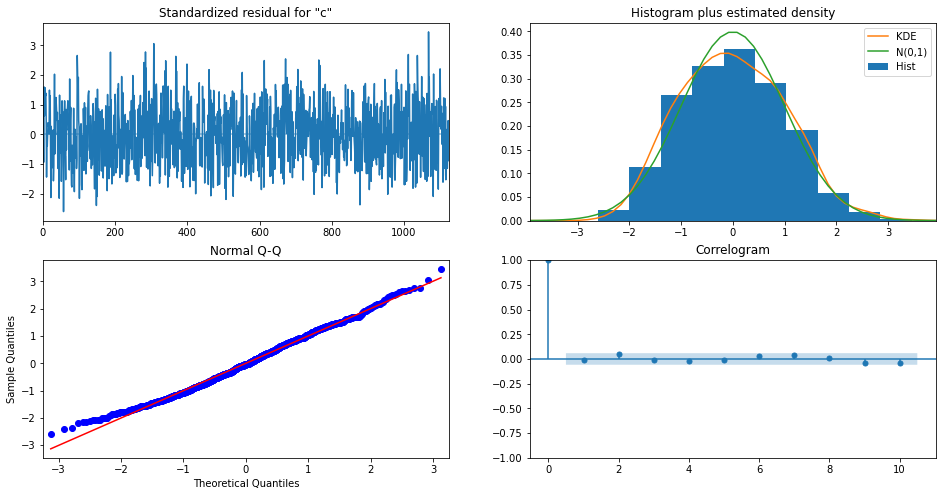

In [61]:
# run model diagnostics to investigate any unusual behavior.
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [62]:
df = df[['date', 'calls']]
df = df.set_index('date')
df.index

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08',
               '2016-04-09', '2016-04-10',
               ...
               '2019-05-18', '2019-05-19', '2019-05-20', '2019-05-21',
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27'],
              dtype='datetime64[ns]', name='date', length=1152, freq=None)

<AxesSubplot:xlabel='date'>

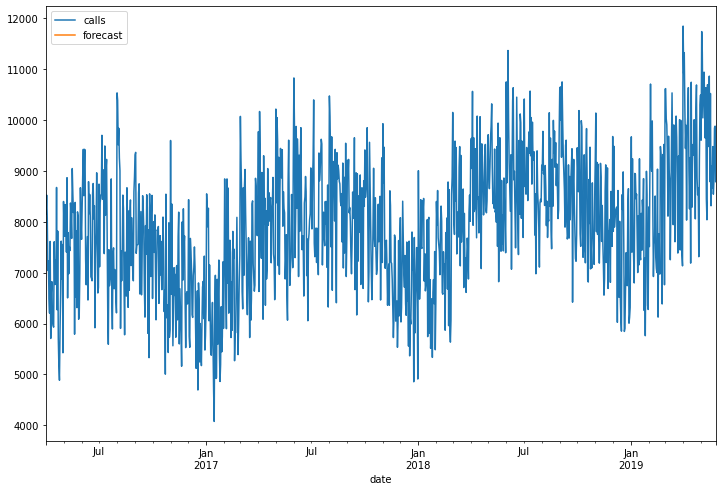

In [63]:
#Validating forecasts

df['forecast']=results.predict(start=920, dynamic=True)
df[['calls','forecast']].plot(figsize=(12,8))

In [65]:
df.iloc[921]

calls       9870.0
forecast       NaN
Name: 2018-10-09 00:00:00, dtype: float64